In [47]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras.datasets import cifar10

(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.0
test_X = test_X / 255.0


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [48]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: [6]
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [49]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [50]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU



In [64]:
batch_size = 64
epochs = 20
num_classes = 10

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 2048)            

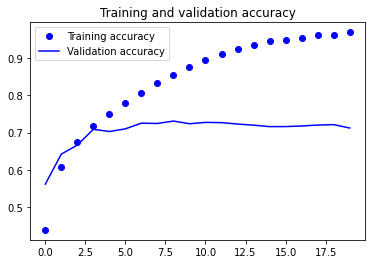

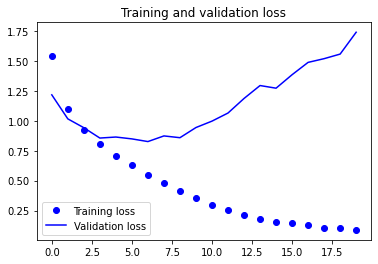

In [65]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

trained = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=0)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


# trained.history
accuracy = trained.history['accuracy']
val_accuracy = trained.history['val_accuracy']
loss = trained.history['loss']
val_loss = trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Epoch 1/20
625/625 [==============================] - 23s 34ms/step - loss: 2.0475 - accuracy: 0.2352 - val_loss: 1.7991 - val_accuracy: 0.3345
Epoch 2/20
625/625 [==============================] - 21s 33ms/step - loss: 1.7749 - accuracy: 0.3606 - val_loss: 1.6761 - val_accuracy: 0.3976
Epoch 3/20
625/625 [==============================] - 21s 33ms/step - loss: 1.6744 - accuracy: 0.3937 - val_loss: 1.6041 - val_accuracy: 0.4191
Epoch 4/20
625/625 [==============================] - 21s 33ms/step - loss: 1.6249 - accuracy: 0.4097 - val_loss: 1.5961 - val_accuracy: 0.4231
Epoch 5/20
625/625 [==============================] - 21s 33ms/step - loss: 1.5653 - accuracy: 0.4334 - val_loss: 1.5850 - val_accuracy: 0.4239
Epoch 6/20
625/625 [==============================] - 21s 33ms/step - loss: 1.5152 - accuracy: 0.4531 - val_loss: 1.5505 - val_accuracy: 0.4429
Epoch 7/20
625/625 [==============================] - 21s 33ms/step - loss: 1.4731 - accuracy: 0.4672 - val_loss: 1.5504 - val_accuracy:

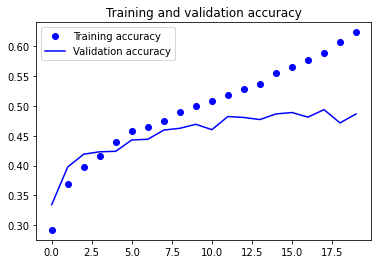

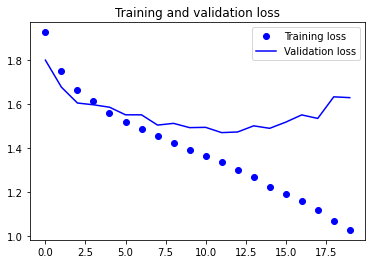

In [59]:
model2 = Sequential()

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

epochs2 = 20

model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
# model2.summary()

trained2 = model2.fit(train_X, train_label, batch_size=batch_size,epochs=epochs2, verbose=1,validation_data=(valid_X, valid_label))

test_eval2 = model2.evaluate(test_X, test_Y_one_hot, verbose=0)

print('Test loss:', test_eval2[0])
print('Test accuracy:', test_eval2[1])

accuracy2 = trained2.history['accuracy']
val_accuracy2 = trained2.history['val_accuracy']
loss2 = trained2.history['loss']
val_loss2 = trained2.history['val_loss']
epochs2 = range(len(accuracy2))
plt.plot(epochs2, accuracy2, 'bo', label='Training accuracy')
plt.plot(epochs2, val_accuracy2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/20
625/625 [==============================] - 25s 35ms/step - loss: 2.3334 - accuracy: 0.1270 - val_loss: 2.1667 - val_accuracy: 0.1489
Epoch 2/20
625/625 [==============================] - 21s 34ms/step - loss: 2.1588 - accuracy: 0.1630 - val_loss: 2.1757 - val_accuracy: 0.1597
Epoch 3/20
625/625 [==============================] - 21s 34ms/step - loss: 2.1527 - accuracy: 0.1617 - val_loss: 2.1568 - val_accuracy: 0.1636
Epoch 4/20
625/625 [==============================] - 21s 34ms/step - loss: 2.1412 - accuracy: 0.1648 - val_loss: 2.1147 - val_accuracy: 0.1947
Epoch 5/20
625/625 [==============================] - 21s 34ms/step - loss: 2.1395 - accuracy: 0.1667 - val_loss: 2.1223 - val_accuracy: 0.1856
Epoch 6/20
625/625 [==============================] - 21s 34ms/step - loss: 2.1301 - accuracy: 0.1696 - val_loss: 2.1304 - val_accuracy: 0.1943
Epoch 7/20
625/625 [==============================] - 21s 34ms/step - loss: 2.1381 - accuracy: 0.1703 - val_loss: 2.1107 - val_accuracy:

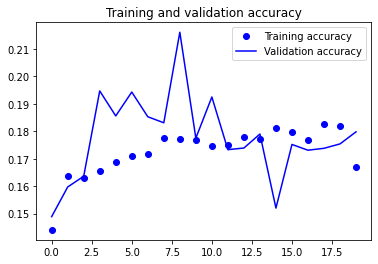

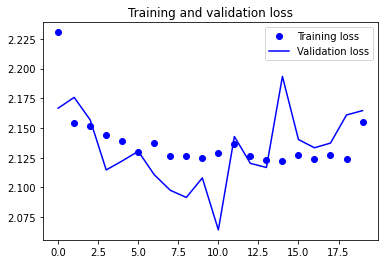

In [60]:
model3 = Sequential()

model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

epochs3 = 20

model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
# model2.summary()

trained3 = model3.fit(train_X, train_label, batch_size=batch_size,epochs=epochs3, verbose=1,validation_data=(valid_X, valid_label))

test_eval3 = model3.evaluate(test_X, test_Y_one_hot, verbose=0)

print('Test loss:', test_eval3[0])
print('Test accuracy:', test_eval3[1])

accuracy3 = trained3.history['accuracy']
val_accuracy3 = trained3.history['val_accuracy']
loss3 = trained3.history['loss']
val_loss3 = trained3.history['val_loss']
epochs3 = range(len(accuracy3))
plt.plot(epochs3, accuracy3, 'bo', label='Training accuracy')
plt.plot(epochs3, val_accuracy3, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs3, loss3, 'bo', label='Training loss')
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

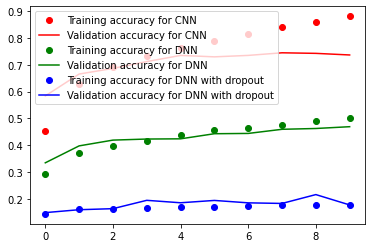

In [62]:
plt.figure()

# CNN 
plt.plot(epochs[:10], accuracy[:10], 'bo', color='r', label='Training accuracy for CNN')
plt.plot(epochs[:10], val_accuracy[:10], 'b', color='r', label='Validation accuracy for CNN')

# simple DNN 
plt.plot(epochs2[:10], accuracy2[:10], 'bo', color='g', label='Training accuracy for DNN')
plt.plot(epochs2[:10], val_accuracy2[:10], 'b', color='g', label='Validation accuracy for DNN')

# simple DNN with dropout
plt.plot(epochs3[:10], accuracy3[:10], 'bo', color='b', label='Training accuracy for DNN with dropout')
plt.plot(epochs3[:10], val_accuracy3[:10], 'b', color='b', label='Validation accuracy for DNN with dropout')

plt.legend()
plt.show()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 2048)            

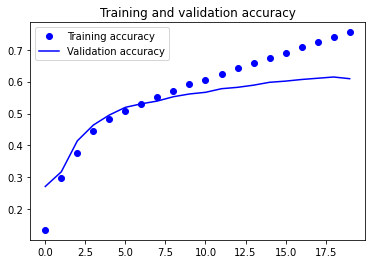

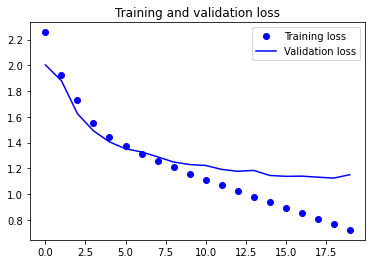

In [66]:
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',input_shape=(32,32,3),padding='same'))
model4.add(MaxPooling2D((2, 2),padding='same'))

model4.add(Conv2D(64, (3, 3), activation='sigmoid',padding='same'))
model4.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model4.add(Conv2D(128, (3, 3), activation='sigmoid',padding='same'))
model4.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model4.add(Flatten())
model4.add(Dense(128, activation='sigmoid'))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model4.summary()

epochs4 = 20

trained4 = model4.fit(train_X, train_label, batch_size=batch_size,epochs=epochs4,verbose=1,validation_data=(valid_X, valid_label))

test_eval4 = model4.evaluate(test_X, test_Y_one_hot, verbose=0)

print('Test loss:', test_eval4[0])
print('Test accuracy:', test_eval4[1])


# trained.history
accuracy4 = trained4.history['accuracy']
val_accuracy4 = trained4.history['val_accuracy']
loss4 = trained4.history['loss']
val_loss4 = trained4.history['val_loss']
epochs4 = range(len(accuracy4))
plt.plot(epochs4, accuracy4, 'bo', label='Training accuracy')
plt.plot(epochs4, val_accuracy4, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs4, loss4, 'bo', label='Training loss')
plt.plot(epochs4, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


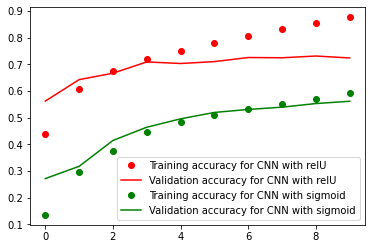

In [67]:
plt.figure()

# CNN relU
plt.plot(epochs[:10], accuracy[:10], 'bo', color='r', label='Training accuracy for CNN with relU')
plt.plot(epochs[:10], val_accuracy[:10], 'b', color='r', label='Validation accuracy for CNN with relU')

# CNN sigmoid
plt.plot(epochs4[:10], accuracy4[:10], 'bo', color='g', label='Training accuracy for CNN with sigmoid')
plt.plot(epochs4[:10], val_accuracy4[:10], 'b', color='g', label='Validation accuracy for CNN with sigmoid')

plt.legend()
plt.show()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 128)       

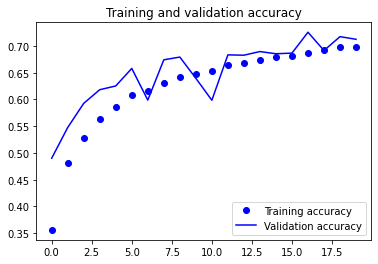

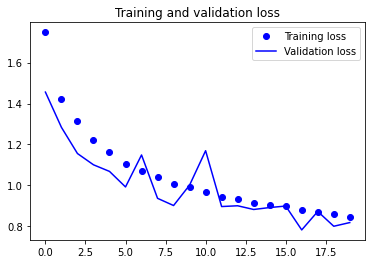

In [69]:
epochs5 = 20

model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3),padding='same'))
model5.add(MaxPooling2D((2, 2),padding='same'))
model5.add(Dropout(0.5))

model5.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model5.add(Dropout(0.5))

model5.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model5.add(Dropout(0.5))

model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model5.summary()

trained5 = model5.fit(train_X, train_label, batch_size=batch_size,epochs=epochs5,verbose=1,validation_data=(valid_X, valid_label))

test_eval5 = model5.evaluate(test_X, test_Y_one_hot, verbose=0)

print('Test loss:', test_eval5[0])
print('Test accuracy:', test_eval5[1])


# trained.history
accuracy5 = trained5.history['accuracy']
val_accuracy5 = trained5.history['val_accuracy']
loss5 = trained5.history['loss']
val_loss5 = trained5.history['val_loss']
epochs5 = range(len(accuracy5))
plt.plot(epochs5, accuracy5, 'bo', label='Training accuracy')
plt.plot(epochs5, val_accuracy5, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs5, loss5, 'bo', label='Training loss')
plt.plot(epochs5, val_loss5, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


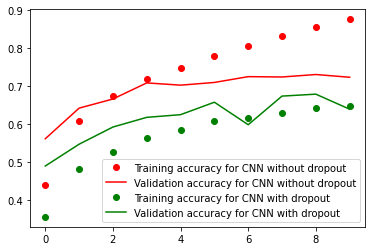

In [70]:
plt.figure()

# CNN without dropout
plt.plot(epochs[:10], accuracy[:10], 'bo', color='r', label='Training accuracy for CNN without dropout')
plt.plot(epochs[:10], val_accuracy[:10], 'b', color='r', label='Validation accuracy for CNN without dropout')

# CNN with dropout
plt.plot(epochs5[:10], accuracy5[:10], 'bo', color='g', label='Training accuracy for CNN with dropout')
plt.plot(epochs5[:10], val_accuracy5[:10], 'b', color='g', label='Validation accuracy for CNN with dropout')

plt.legend()
plt.show()